# Nitrogen fertilizer price trend

# Data import

This data gives the long-term evolution of nitrogen fertilizer price in USD

In [1]:
import requests

url = 'https://app-learninglab.inria.fr/moocrr/gitlab/1d334d5105a1a432e18f2e361780bab5/mooc-rr/raw/master/module2/exo4/PCU325311325311.csv?inline=false'
data = requests.get(url).text
print(data)

DATE,PCU325311325311
1975-12-01,88.1
1976-01-01,87.6
1976-02-01,85.0
1976-03-01,84.8
1976-04-01,84.7
1976-05-01,84.6
1976-06-01,83.5
1976-07-01,83.0
1976-08-01,83.2
1976-09-01,83.1
1976-10-01,83.5
1976-11-01,83.2
1976-12-01,83.0
1977-01-01,82.5
1977-02-01,84.5
1977-03-01,86.9
1977-04-01,87.6
1977-05-01,87.4
1977-06-01,87.1
1977-07-01,87.2
1977-08-01,87.1
1977-09-01,87.2
1977-10-01,86.4
1977-11-01,84.6
1977-12-01,83.9
1978-01-01,83.3
1978-02-01,85.0
1978-03-01,86.6
1978-04-01,86.7
1978-05-01,86.1
1978-06-01,85.7
1978-07-01,85.2
1978-08-01,84.5
1978-09-01,84.5
1978-10-01,85.5
1978-11-01,84.2
1978-12-01,83.9
1979-01-01,84.0
1979-02-01,85.1
1979-03-01,86.4
1979-04-01,89.4
1979-05-01,89.8
1979-06-01,89.3
1979-07-01,90.6
1979-08-01,91.7
1979-09-01,93.4
1979-10-01,95.1
1979-11-01,98.4
1979-12-01,100.0
1980-01-01,.
1980-02-01,.
1980-03-01,.
1980-04-01,.
1980-05-01,.
1980-06-01,.
1980-07-01,.
1980-08-01,.
1980-09-01,.
1980-10-01,.
1980-11-01,.
1980-12-01,116.1
1981-01-01,118.9
1981-02-01,121.6


We convert this big string into csv

In [2]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO(data), sep=',', decimal='.')
df.columns = ['date', 'price']

Then we convert values as needed

In [3]:
df.date[0]

'1975-12-01'

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%M-%d')
df.date[0]

Timestamp('1975-01-01 00:12:00')

In [5]:
import numpy as np
df = df.replace('.', np.NaN)
df['price'] = pd.to_numeric(df['price'])

# Data viz.

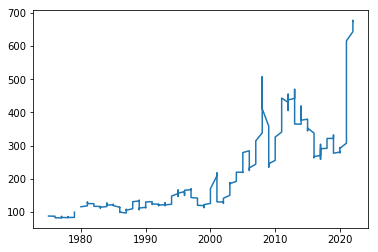

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(df.date, df.price)

# Mean price before 2000

In [7]:
import datetime
prices_before_2000 = df[df['date']<datetime.datetime.strptime('2000-01-01', '%Y-%M-%d')]

In [8]:
np.around(prices_before_2000.mean(), decimals=2)

price    120.05
dtype: float64

# Std price before 2000

In [9]:
np.around(prices_before_2000.std(ddof=1), decimals=2)

price    21.58
dtype: float64

# Mean price after 2000

In [10]:
prices_after_2000 = df[df['date']>=datetime.datetime.strptime('2000-01-01', '%Y-%M-%d')]

In [11]:
np.around(prices_after_2000.mean(), decimals=2)

price    298.67
dtype: float64

# Std price after 2000

In [12]:
np.around(prices_after_2000.std(ddof=1), decimals=2)

price    103.63
dtype: float64